In [1]:
import pandas as pd
import numpy as np

In [2]:
df = pd.read_csv("/Users/charlottezhao/Desktop/airline_data_final.csv")
df.head()

,Gender,Customer.Type,Age,Type.of.Travel,Flight.Distance,Inflight.wifi.service,Departure.Arrival.time.convenient,Ease.of.Online.booking,Gate.location,Food.and.drink,...,Inflight.entertainment,On.board.service,Leg.room.service,Baggage.handling,Checkin.service,Inflight.service,Cleanliness,Departure.Delay.in.Minutes,Arrival.Delay.in.Minutes,satisfaction
0,0,0,13,1,460,3,4,3,1,5,...,5,4,3,4,4,5,5,25,18,0
1,0,1,25,0,235,3,2,3,3,1,...,1,1,5,3,1,4,1,1,6,0
2,1,0,26,0,1142,2,2,2,2,5,...,5,4,3,4,4,4,5,0,0,1
3,1,0,25,0,562,2,5,5,5,2,...,2,2,5,3,1,4,2,11,9,0
4,0,0,61,0,214,3,3,3,3,4,...,3,3,4,4,3,3,3,0,0,1


In [3]:
from sklearn.model_selection import train_test_split

y = df['satisfaction'].values
X = df.iloc[:, :-1].values

X_train, X_test, y_train, y_test = \
    train_test_split(X, y, test_size=0.3, random_state=0, stratify=y)

print('Train/Test sizes:', y_train.shape[0], y_test.shape[0])

Train/Test sizes: 90640 38847


/opt/anaconda3/lib/python3.8/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[23:16:02] WARNING: /opt/concourse/worker/volumes/live/7a2b9f41-3287-451b-6691-43e9a6c0910f/volume/xgboost-split_1619728204606/work/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
Training Accuracy: 0.9754
Test Accuracy: 0.9614


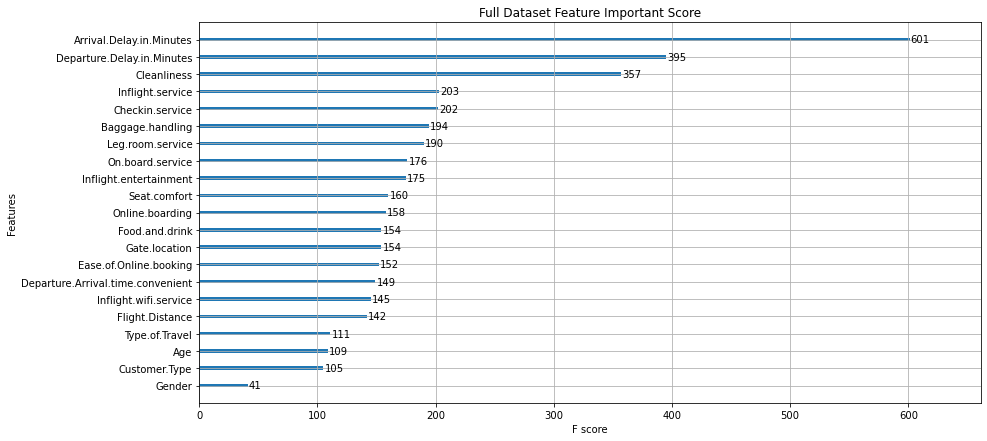

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.300000012, max_delta_step=0, max_depth=6,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=100, n_jobs=4, num_parallel_tree=1, random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

In [17]:
#XGBoost
import numpy as np
import xgboost as xgb
from xgboost import plot_importance
from matplotlib import pyplot
import matplotlib.pyplot as plt


boost = xgb.XGBClassifier()

boost.fit(X_train, y_train)
    
print("Training Accuracy: %0.4f" % boost.score(X_train, y_train))
print("Test Accuracy: %0.4f" % boost.score(X_test, y_test))

plt.rcParams["figure.figsize"] = (14, 7)
ax = plot_importance(boost)
ticks = ax.set_yticklabels(df.columns[:-1])
title = ax.set_title("Full Dataset Feature Important Score")

plt.savefig('XGBoost.png')
pyplot.show()
boost

In [7]:
df_ob = pd.read_csv("/Users/charlottezhao/Desktop/airline_subset_objective_adjusted.csv")
df_ob.head()

,Customer.Type,Type.of.Travel,Class,Departure.Delay.in.Minutes,Arrival.Delay.in.Minutes,satisfaction
0,0,1,1,25,18,0
1,1,0,0,1,6,0
2,0,0,0,0,0,1
3,0,0,0,11,9,0
4,0,0,0,0,0,1


In [8]:
y_ob = df_ob['satisfaction'].values
X_ob = df_ob.iloc[:, :-1].values

X_train_ob, X_test_ob, y_train_ob, y_test_ob = \
    train_test_split(X_ob, y_ob, test_size=0.3, random_state=0, stratify=y_ob)

print('Train/Test sizes:', y_train_ob.shape[0], y_test_ob.shape[0])

Train/Test sizes: 90640 38847


/opt/anaconda3/lib/python3.8/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[23:17:30] WARNING: /opt/concourse/worker/volumes/live/7a2b9f41-3287-451b-6691-43e9a6c0910f/volume/xgboost-split_1619728204606/work/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
Training Accuracy: 0.7933
Test Accuracy: 0.7907


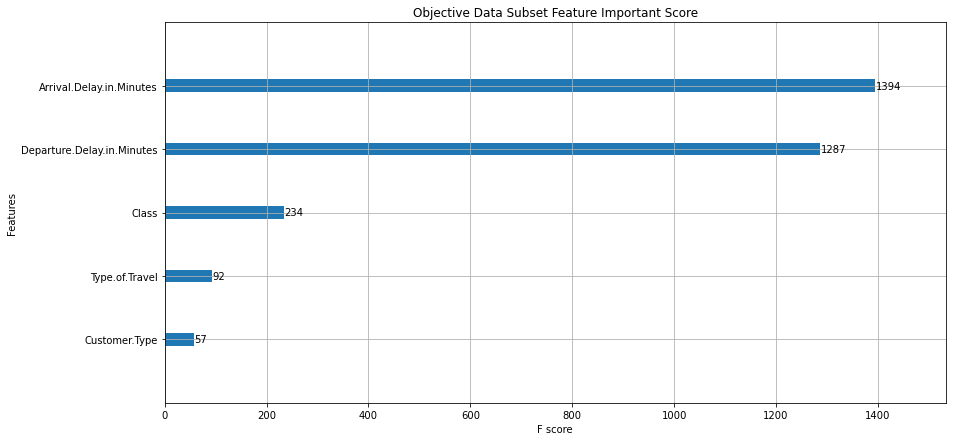

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.300000012, max_delta_step=0, max_depth=6,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=100, n_jobs=4, num_parallel_tree=1, random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

In [18]:
#XGBoost
boost = xgb.XGBClassifier()

boost.fit(X_train_ob, y_train_ob)
    
print("Training Accuracy: %0.4f" % boost.score(X_train_ob, y_train_ob))
print("Test Accuracy: %0.4f" % boost.score(X_test_ob, y_test_ob))

plt.rcParams["figure.figsize"] = (14, 7)
ax = plot_importance(boost)
ticks = ax.set_yticklabels(df_ob.columns[:-1])
title = ax.set_title("Objective Data Subset Feature Important Score")

plt.savefig('XGBoost_ob.png')
pyplot.show()
boost

In [11]:
df_sub = pd.read_csv("/Users/charlottezhao/Desktop/airline_subset_subjective_adjusted.csv")
df_sub.head()

,Gender,Age,Inflight.wifi.service,Departure.Arrival.time.convenient,Ease.of.Online.booking,Gate.location,Food.and.drink,Online.boarding,Seat.comfort,Inflight.entertainment,On.board.service,Leg.room.service,Baggage.handling,Checkin.service,Inflight.service,Cleanliness,satisfaction
0,0,13,3,4,3,1,5,3,5,5,4,3,4,4,5,5,0
1,0,25,3,2,3,3,1,3,1,1,1,5,3,1,4,1,0
2,1,26,2,2,2,2,5,5,5,5,4,3,4,4,4,5,1
3,1,25,2,5,5,5,2,2,2,2,2,5,3,1,4,2,0
4,0,61,3,3,3,3,4,5,5,3,3,4,4,3,3,3,1


In [12]:
y_sub = df_sub['satisfaction'].values
X_sub = df_sub.iloc[:, :-1].values

X_train_sub, X_test_sub, y_train_sub, y_test_sub = \
    train_test_split(X_sub, y_sub, test_size=0.3, random_state=0, stratify=y_sub)

print('Train/Test sizes:', y_train_sub.shape[0], y_test_sub.shape[0])

Train/Test sizes: 90640 38847


/opt/anaconda3/lib/python3.8/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[23:17:47] WARNING: /opt/concourse/worker/volumes/live/7a2b9f41-3287-451b-6691-43e9a6c0910f/volume/xgboost-split_1619728204606/work/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
Training Accuracy: 0.9626
Test Accuracy: 0.9486


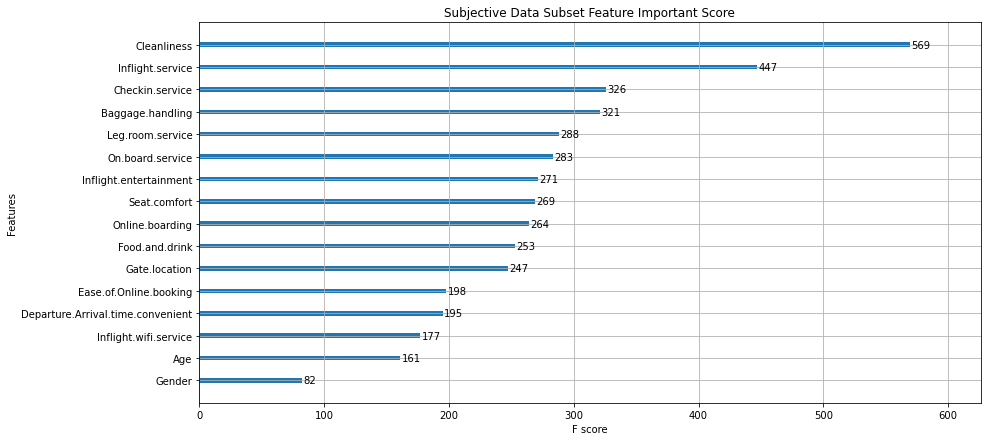

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.300000012, max_delta_step=0, max_depth=6,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=100, n_jobs=4, num_parallel_tree=1, random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

In [19]:
#XGBoost
boost = xgb.XGBClassifier()

boost.fit(X_train_sub, y_train_sub)
    
print("Training Accuracy: %0.4f" % boost.score(X_train_sub, y_train_sub))
print("Test Accuracy: %0.4f" % boost.score(X_test_sub, y_test_sub))

plt.rcParams["figure.figsize"] = (14, 7)
ax = plot_importance(boost)
ticks = ax.set_yticklabels(df_sub.columns[:-1])
title = ax.set_title("Subjective Data Subset Feature Important Score")

plt.savefig('XGBoost_sub.png')
pyplot.show()
boost